In [1]:
import sys 
sys.path.append('..')
import random
from PIL import Image
import requests
from utils import *
import yaml
from diffusers.utils import load_image, make_image_grid 
import numpy as np 
from ultralytics import YOLO
from scripts.sam_results import SAMResults
from datasets import load_dataset
import random

yaml_file = "../configs/fashion_people_detection.yml"
with open(yaml_file, "r") as f:
    config = yaml.safe_load(f)

labels_dict = config.get("names")
labels_dict_reversed = {v: k for k, v in labels_dict.items()}

In [2]:
dataset_id = "jordandavis/fashion_people_detections"

ds = load_dataset(dataset_id, split='train', trust_remote_code=True)

Resolving data files:   0%|          | 0/20 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/20 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/21 [00:00<?, ?it/s]

In [3]:
model_path = "/home/jordan/SEGMENT/human_parsing/train20/weights/best.pt"
model = YOLO(model_path, task="segment")

In [13]:
row_num = random.randint(0, len(ds))
print(f"Row Num: {row_num}")

Row Num: 10267


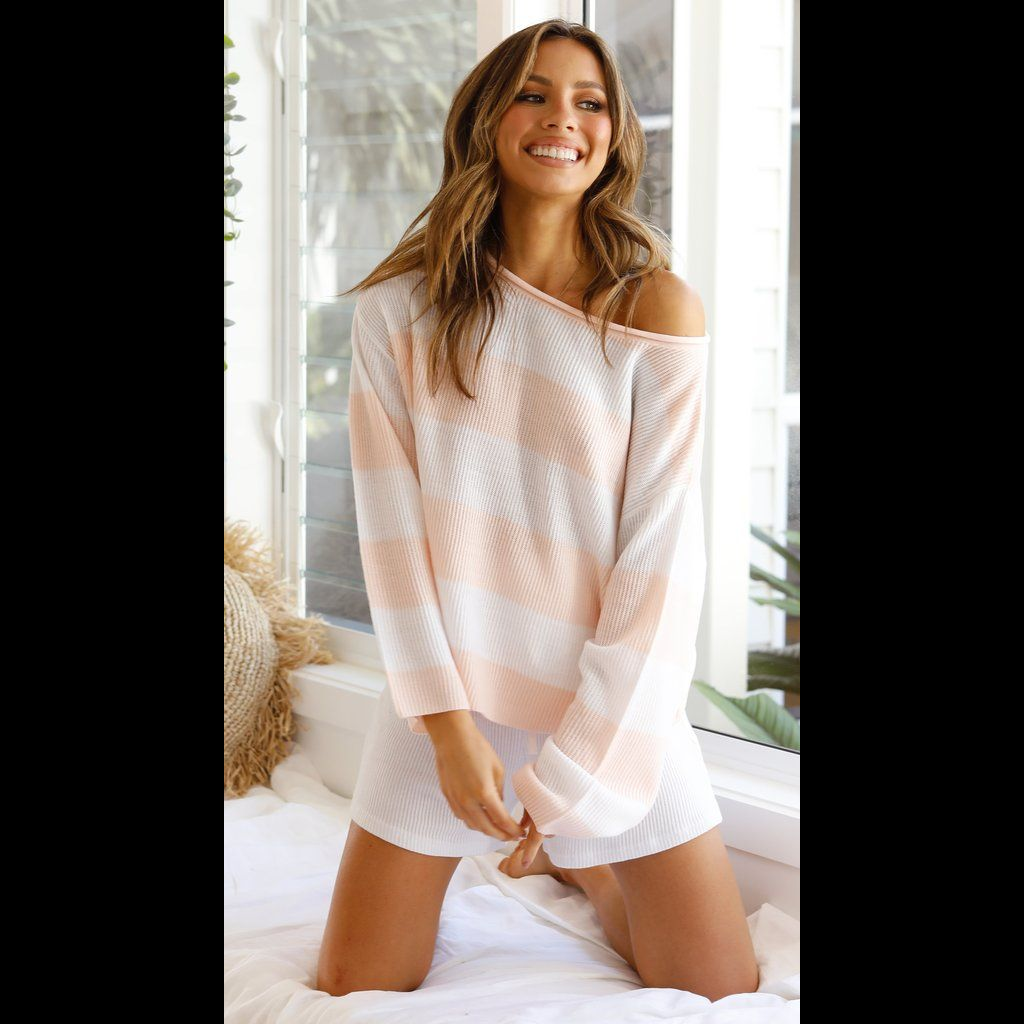

In [5]:
row = ds[row_num]
image = row['image']
image = resize_image_pil(image)
image

In [14]:
results = model(image)
result = results[0]


0: 1024x1024 1 hair, 1 face, 1 neck, 1 hand, 2 legs, 2 outfits, 1 person, 13.6ms
Speed: 3.2ms preprocess, 13.6ms inference, 2.3ms postprocess per image at shape (1, 3, 1024, 1024)


In [15]:
def unload(result):
    masks = result.masks.data
    boxes = result.boxes.xyxy
    scores = result.boxes.conf

    labels = result.boxes.cls
    labels = [int(label.item()) for label in labels]
    phrases = [labels_dict[label] for label in labels]
    return masks, boxes, scores, phrases

In [16]:
masks, boxes, scores, phrases = unload(result)

In [17]:
r = SAMResults(image, labels_dict_reversed, masks=masks, boxes=boxes, scores=scores, phrases=phrases)

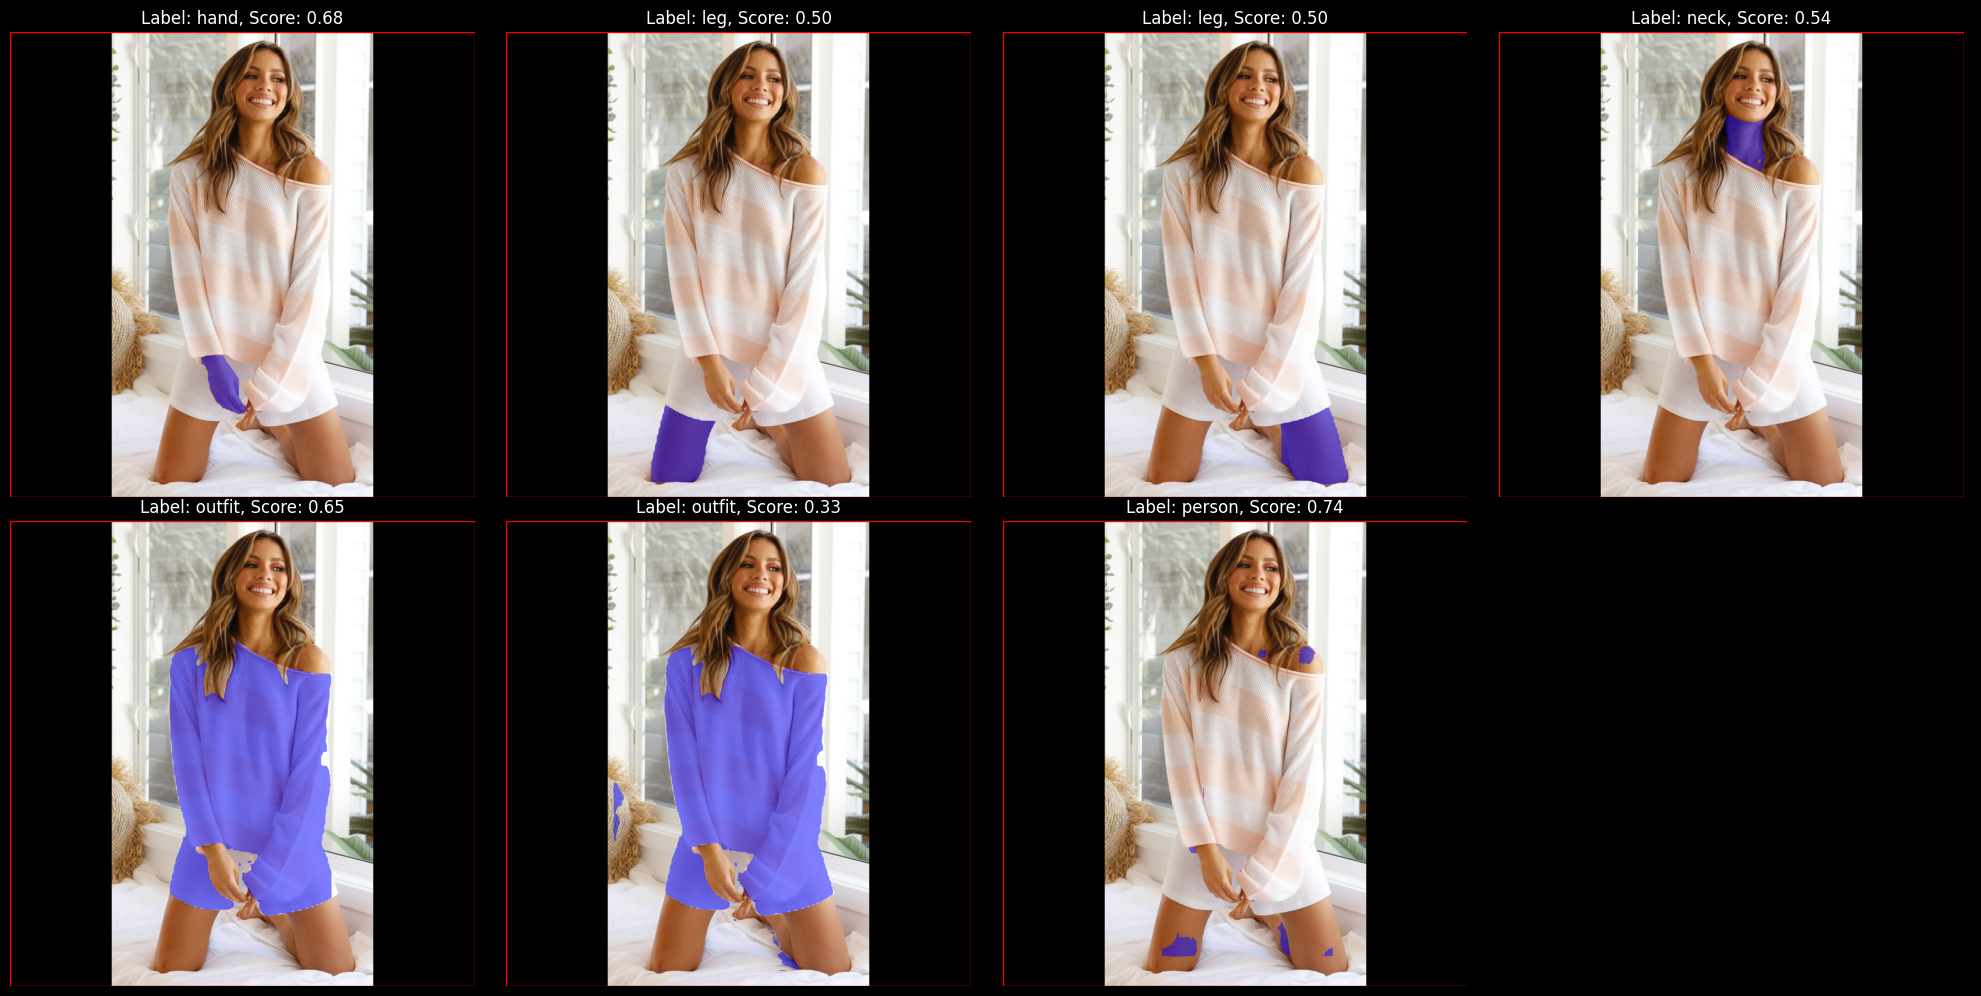

In [19]:
r.display_results()

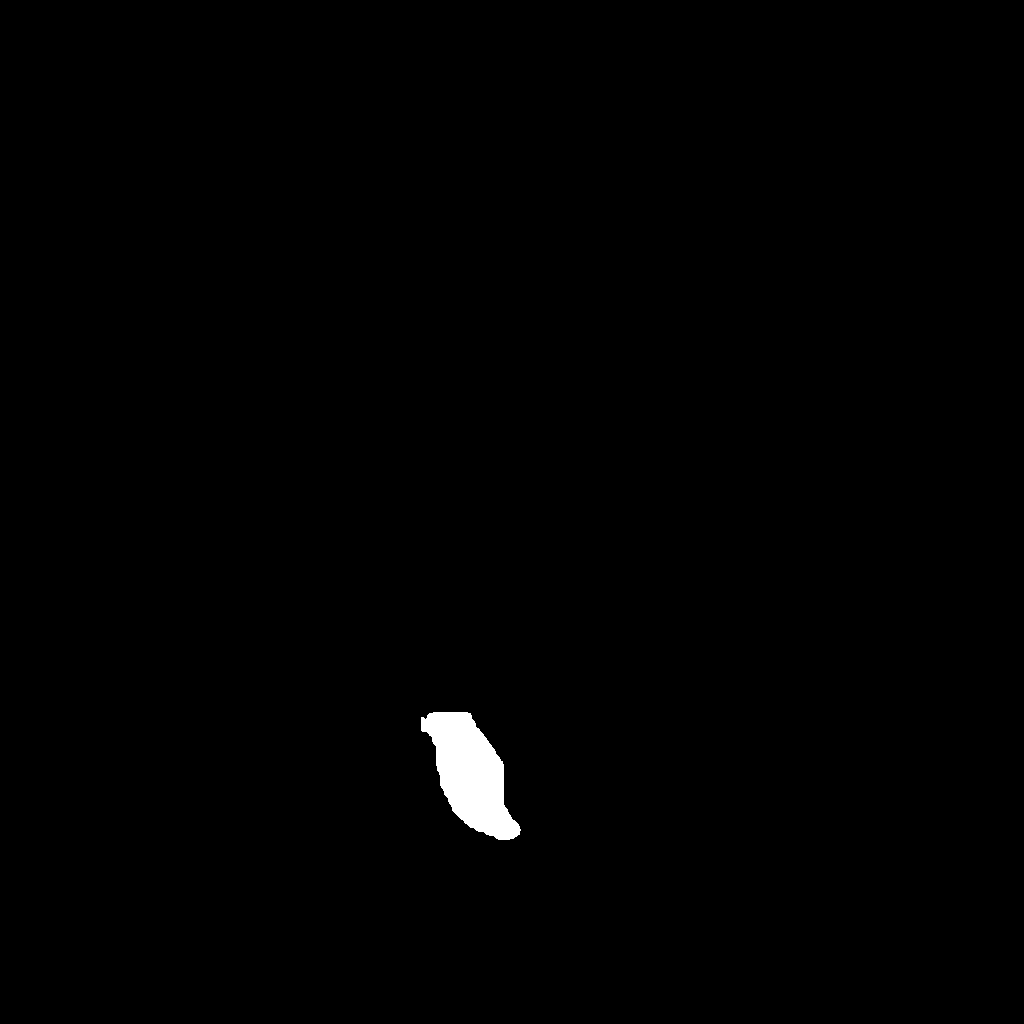

In [22]:
r.get_mask('hand')[0]['mask']